# Project : Exploring the UK's rice imports and exports

by Aya Tamura, 25 November, 2023, updated 22 December, 2023

As an Asian living in the United Kingdom, I often eat rice and appreciate the availability of variety of rice in shops. According to [the Rice Association]('https://www.riceassociation.org.uk/rice-in-the-uk'), rice is not grown in the UK. I wonder where rice comes from to the UK. Is rice cultivated domestically within the UK actually, or is it solely imported from abroad? In this project, I aim to conduct research on the locales where rice comes from using available data.

## Research Questions
1. Which countries import the most rice for the UK in 2022?
2. Does UK export rice to other countries? If yes, which countries export the most rice for the UK in 2022?
3. What kinds of rice are most popular for import and export? 

## Analytical approaches
How do we define 'best' and 'popularity'?

In general, the values of import and export are often used to measure trade intensity. 
In this research, to measure 'best' and 'popularity' of rice trade for the UK, we use the total of trade values (USD) in 2022.

## Getting Data

The United Nations (UN) Comtrade database have wide range of global trade data. It shall be leveraged to analyze the UK's rice imports and exports:

- What quantities of rice does the UK export and import, and does a positive balance exist (exports surpassing imports)?
- Which countries constitute the primary trading partners, i.e. from which nations does the UK import most rice, and to which countries are the greatest exports bound?
- Which countries reliably purchase rice from the UK on a monthly basis - the consistent clients?
- Regarding rice, which countries does the UK both import from and export to?

I aim to conduct a judicious study of the UK rice trade sector utilizing UN Comtrade in 2022.
The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following configuration:

- Type of Product: goods
- Frequency: Monthly 
- Periods: All of 2022
- Reporter: United Kingdom
- Partners: All
- Flows: imports and exports
- HS (as reported) commodity codes: 100610, 100620, 100630, 100640

In [551]:
# Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [552]:
# Assign a file location of the CSV data
LOCATION = 'comtrade_rice_monthly_22.csv'

The downloaded file is saved using a file encoding (*Latin-1*). As Pandas does not recognise this by default, resulting in `UnicodeDecodeError`.　Hence, reading a file with `encoding = "Latin-1"` should fix the problem.

In [553]:
# Read the CSV data with latin-1 encoding and diaplay
rice = pd.read_csv(LOCATION, encoding='latin-1')
rice.head()

,TypeCode,FreqCode,RefPeriodId,RefYear,RefMonth,Period,ReporterCode,ReporterISO,ReporterDesc,FlowCode,...,IsNetWgtEstimated,GrossWgt,IsGrossWgtEstimated,Cifvalue,Fobvalue,PrimaryValue,LegacyEstimationFlag,IsReported,IsAggregate,Unnamed: 47
0,C,M,20220101,2022,1,202201,826,GBR,United Kingdom,M,...,False,0,False,44525.184,NaN,44525.184,0,False,True,NaN
1,C,M,20220101,2022,1,202201,826,GBR,United Kingdom,M,...,False,0,False,8479.117,NaN,8479.117,0,False,True,NaN
2,C,M,20220101,2022,1,202201,826,GBR,United Kingdom,M,...,False,0,False,2400.542,NaN,2400.542,0,False,True,NaN
3,C,M,20220101,2022,1,202201,826,GBR,United Kingdom,M,...,False,0,False,32479.122,NaN,32479.122,0,False,True,NaN
4,C,M,20220101,2022,1,202201,826,GBR,United Kingdom,M,...,False,0,False,1166.403,NaN,1166.403,0,False,True,NaN


## Data Cleaning
1. Drop irrelevant columns
2. Drop irrelevant rows
3. Check missing values

In [554]:
rice.columns

Index(['TypeCode', 'FreqCode', 'RefPeriodId', 'RefYear', 'RefMonth', 'Period',
       'ReporterCode', 'ReporterISO', 'ReporterDesc', 'FlowCode', 'FlowDesc',
       'PartnerCode', 'PartnerISO', 'PartnerDesc', 'Partner2Code',
       'Partner2ISO', 'Partner2Desc', 'ClassificationCode',
       'ClassificationSearchCode', 'IsOriginalClassification', 'CmdCode',
       'CmdDesc', 'AggrLevel', 'IsLeaf', 'CustomsCode', 'CustomsDesc',
       'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'QtyUnitAbbr', 'Qty',
       'IsQtyEstimated', 'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AtlQty',
       'IsAltQtyEstimated', 'NetWgt', 'IsNetWgtEstimated', 'GrossWgt',
       'IsGrossWgtEstimated', 'Cifvalue', 'Fobvalue', 'PrimaryValue',
       'LegacyEstimationFlag', 'IsReported', 'IsAggregate', 'Unnamed: 47'],
      dtype='object')

In [555]:
# Drop columns that are irrelevant for this analysis.
YEAR = 'RefYear'
MONTH = 'Period'
FLOW = 'FlowDesc'
PARTNER = 'PartnerDesc'
CODE = 'CmdCode'
RICE = 'CmdDesc'
VALUE = 'PrimaryValue'

heading = [YEAR, MONTH, FLOW, PARTNER, CODE, RICE, VALUE]
rice = rice[heading]

In [556]:
# Check the partner countries
rice[PARTNER].unique()

array(['World', 'Bangladesh', 'Iran', 'Ireland', 'Netherlands',
       'Argentina', 'Belgium', 'Cambodia', 'Sri Lanka', 'France',
       'Greece', 'Guyana', 'Iraq', 'Italy', 'Pakistan', 'Paraguay',
       'Romania', 'India', 'Viet Nam', 'Spain', 'Thailand', 'Türkiye',
       'USA', 'Uruguay', 'Australia', 'Brazil', 'Bulgaria', 'China',
       'Germany', 'Japan', 'Rep. of Korea', "Lao People's Dem. Rep.",
       'Lebanon', 'Other Asia, nes', 'Poland', 'Portugal',
       'United Arab Emirates', 'Myanmar', 'Kazakhstan', 'Nigeria',
       'Russian Federation', 'China, Hong Kong SAR', 'Cyprus', 'Iceland',
       'Israel', 'Malta', 'Areas, nes', 'Austria', 'Czechia', 'Finland',
       'Sweden', 'Switzerland', 'Gibraltar', 'Mexico', 'Egypt', 'Gambia',
       'Saudi Arabia', 'Bahrain', 'Cayman Isds', 'Croatia', 'Latvia',
       'Norway', 'Qatar', 'Kuwait', 'Lithuania', 'Azerbaijan',
       'Bolivia (Plurinational State of)', 'Bermuda', 'Philippines',
       'Singapore', 'Yemen', 'Suriname', 'C

The data contains the total imports and exports per month, under the 'World' partner. Those rows are removed to keep only the per-country data.

In [557]:
# Removing irrelevant data 'World'
rice = rice[rice[PARTNER] != 'World']
rice.head()

,RefYear,Period,FlowDesc,PartnerDesc,CmdCode,CmdDesc,PrimaryValue
1,2022,202201,Import,Bangladesh,100610,Cereals; rice in the husk (paddy or rough),8479.117
2,2022,202201,Import,Iran,100610,Cereals; rice in the husk (paddy or rough),2400.542
3,2022,202201,Import,Ireland,100610,Cereals; rice in the husk (paddy or rough),32479.122
4,2022,202201,Import,Netherlands,100610,Cereals; rice in the husk (paddy or rough),1166.403
6,2022,202201,Import,Argentina,100620,Cereals; husked (brown) rice,2079022.784


In [558]:
# Check if there are any missing values
rice[pd.isnull(rice).any(axis=1)]

,RefYear,Period,FlowDesc,PartnerDesc,CmdCode,CmdDesc,PrimaryValue


In [559]:
# Check the rice type and code
rice_code = [CODE, RICE]
rice[rice_code].apply(lambda x: x.unique())

,CmdCode,CmdDesc
0,100610,Cereals; rice in the husk (paddy or rough)
1,100620,Cereals; husked (brown) rice
2,100630,"Cereals; rice, semi-milled or wholly milled, w..."
3,100640,"Cereals; rice, broken"


In [560]:
# Define a function that takes a code as input and returns a corresponding rice type
def riceType(code):
    if code == 100610: # Cereals; rice in the husk (paddy or rough)
        return 'rough' 
    if code == 100620: # Cereals; husked (brown) rice
        return 'brown'
    if code == 100630: # Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed
        return 'milled'
    if code == 100640: # Cereals; rice, broken
        return 'broken'
    return 'unknown'

rice['RiceType'] = rice[CODE].apply(riceType)
RICE = 'RiceType'
rice.head(3)

,RefYear,Period,FlowDesc,PartnerDesc,CmdCode,CmdDesc,PrimaryValue,RiceType
1,2022,202201,Import,Bangladesh,100610,Cereals; rice in the husk (paddy or rough),8479.117,rough
2,2022,202201,Import,Iran,100610,Cereals; rice in the husk (paddy or rough),2400.542,rough
3,2022,202201,Import,Ireland,100610,Cereals; rice in the husk (paddy or rough),32479.122,rough


## Total trade flow

To answer the research questions, the dataframe is split into two groups: exports from the UK and imports into the UK. The  trade values within each group are summed up to get the total trading.

In [561]:
g_flow = rice.groupby(FLOW)
g_flow.groups.keys()

dict_keys(['Export', 'Import'])

In [562]:
# Create two datasets: Import and Export
rice_import = g_flow.get_group('Import')
rice_export = g_flow.get_group('Export')

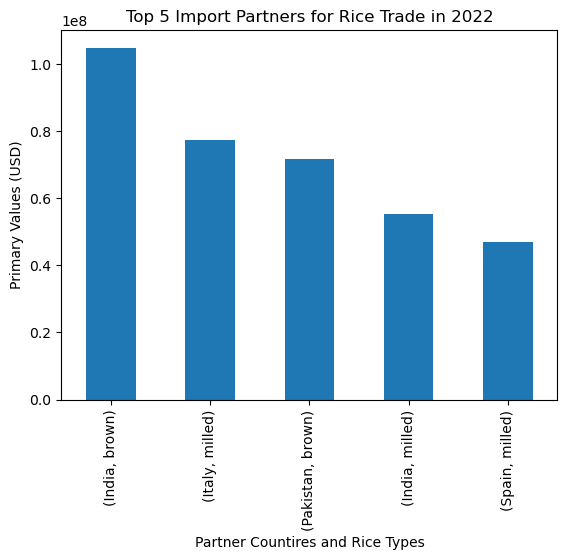

In [563]:
# Import data: Group by partner
rice_import.groupby([PARTNER, RICE])[VALUE].aggregate(sum).sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Partner Countires and Rice Types')
plt.ylabel('Primary Values (USD)')
plt.title('Top 5 Import Partners for Rice Trade in 2022')
plt.show()

Answer the research question 1 and 3:
The best partner country and most popular rice type for import in 2022 were India and brown rice. Importing brown rice and milled rice from Pakistan and Itally respectively was also popular.

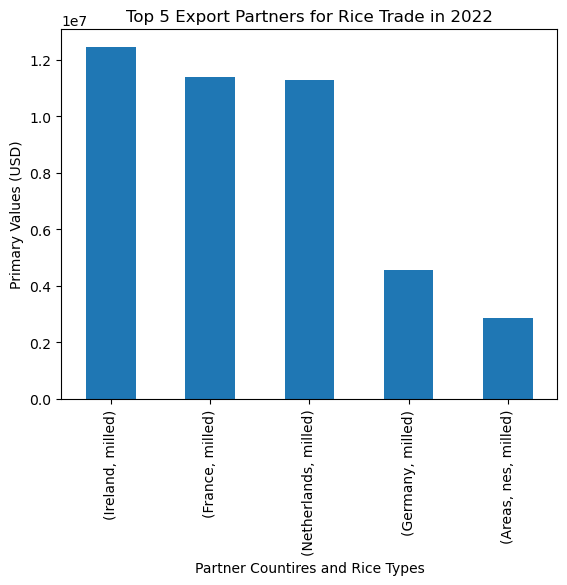

In [564]:
# Export data: Group by partner
rice_export.groupby([PARTNER, RICE])[VALUE].aggregate(sum).sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Partner Countires and Rice Types')
plt.ylabel('Primary Values (USD)')
plt.title('Top 5 Export Partners for Rice Trade in 2022')
plt.show()

Answer the research question 2 and 3:
The UK export rice and milled rice is popular for the export. The best partner country and most popular rice type for rice export in 2022 were Ireland and milled rice. Besides Ireland, Netherland and France were also string partner. 

In [565]:
# Rounds the given value to the nearest thousand
def roundToThousands (value):
    return round(value / 1000)

In [566]:
# Group the data by FLOW (import or export) and aggregate the values
grouped = rice.groupby([FLOW])
grouped[VALUE].aggregate(sum).apply(roundToThousands)

FlowDesc
Export     56988
Import    604831
Name: PrimaryValue, dtype: int64

<Axes: ylabel='FlowDesc'>

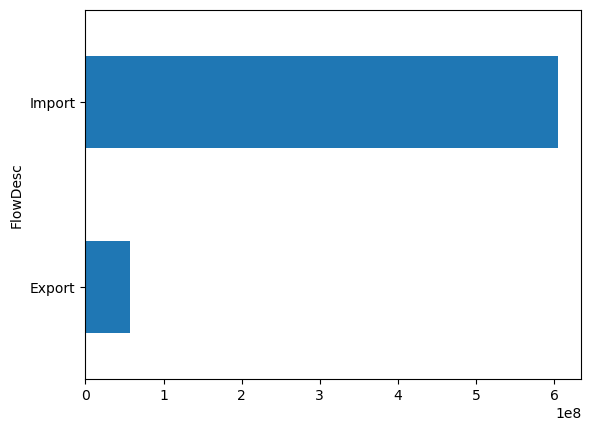

In [567]:
# Plot the aggregated values 
grouped[VALUE].aggregate(sum).plot(kind='barh')

The above bar charts show that imports exceed exports, indicating the UK has a rice trade deficit, with its trade balance being negative by approximately 550 thousand US dollars (604831-56988). 

Among imported rice, milled and brown rice make up the majority, but only milled rice comprises the majority of exports.

It can be assumed that the UK does not grow rice domestically, but conducts a processing trade using imported rice, such as brown rice, and exports milled rice to other countries, mainly in Europe.

## Additional Analysis
Out of my curiosity, I would like to investigate whether there are any seasonal trends in import behavior.

In [568]:
# Examine monthly. Which months saw the largest total value on average of imports, or exports?
g_month = [FLOW, RICE, MONTH]
rice.groupby(g_month)[VALUE].aggregate([sum, min, max, np.mean])

sum       min        max          mean
FlowDesc RiceType Period                                               
Export   broken   202201   70016.722    21.675  41192.603   7001.672200
                  202202  138394.860    83.914  57936.006  13839.486000
                  202203  148403.280    14.493  46531.747  18550.410000
                  202204  135029.882    34.939  52841.887  12275.443818
                  202205  127872.815     4.976  35320.216  11624.801364
...                              ...       ...        ...           ...
Import   rough    202208   12570.657  5313.185   7257.472   6285.328500
                  202209   46537.142  2556.973  19502.723   7756.190333
                  202210   12676.238   572.650   9466.235   4225.412667
                  202211   30099.152  3305.992  19799.671  10033.050667
                  202212   21636.209   310.065  10698.473   5409.052250

[96 rows x 4 columns]

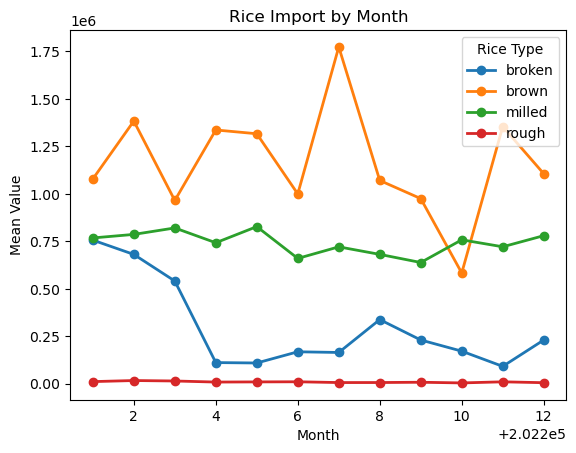

In [569]:
# Visualise the above import data using import mean
rice_import.groupby([MONTH, RICE])[VALUE].mean().unstack(RICE).plot(kind='line', marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Rice Import by Month')
plt.legend(title='Rice Type')
plt.show()

For imported rice, brown rice performed best, followed by polished rice. Both brown and milled rice varied widely from month to month. The peaks were in July and May respectively. On the other hand, rough rice has remained consistently low around 0 from month to month. The value of crushed rice dropped significantly from 0.75 to 0.1 since January and recovered slightly in August and December.

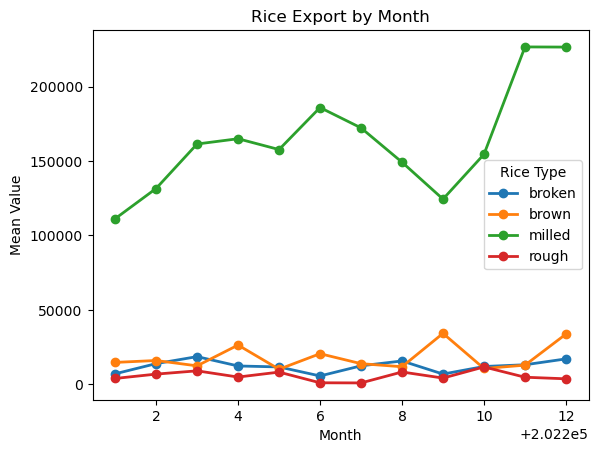

In [570]:
# Visualise the above export data using mean
rice_export.groupby([MONTH, RICE])[VALUE].mean().unstack(RICE).plot(kind='line', marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Rice Export by Month')
plt.legend(title='Rice Type')
plt.show()

In export rice, milled rice performed exceptionally well, with prices rising from 110,000 to 190,000 between January and June. It then dropped initially to the same value as in January in September, but gradually recovered and by December had recovered rapidly to 240,000. Average values for other types of rice remained very low, ranging from 0 to 30 000, and varied slightly from month to month.

Are there any countries that trade rice regularly but not in high volumes (frequent small volume trade) or vice versa (infrequent but high volume trade)?

Define "frequent" and "infrequent":
    "frequent" means trading rice more than 10 months in a year
    "infrequent" means trading rice less than 5 months in a year

Define "high" and "low" volumes:
    "high" means the total trading values were more than 1,000,000 USD.
    "low" means the total trading values were less than 100,000 USD.

In [571]:
# Filter the "frequent" & "low" partners in import dataset
def frequentLow (group):
    return len(group) >= 10 and group[VALUE].sum() < 100000 

regularWeak = rice.groupby([PARTNER, FLOW]).filter(frequentLow)

report_regularWeak = pd.pivot_table(regularWeak,
                                    index= [PARTNER, RICE],
                                    columns=FLOW,
                                    values=VALUE,
                                    aggfunc=sum)
report_regularWeak

FlowDesc                          Export     Import
PartnerDesc          RiceType                      
Argentina            brown      3674.417        NaN
                     milled     8133.761        NaN
China, Hong Kong SAR milled    63505.504        NaN
                     rough      9371.538        NaN
Greece               brown      2936.834        NaN
                     milled    81095.411        NaN
Iran                 broken          NaN  16172.581
                     brown           NaN   2235.504
                     milled          NaN  58089.758
                     rough           NaN   9056.061
Pakistan             milled    10196.817        NaN
Poland               brown           NaN   1205.009
                     milled          NaN  69505.492
                     rough           NaN  13729.245

<Axes: ylabel='PartnerDesc,RiceType'>

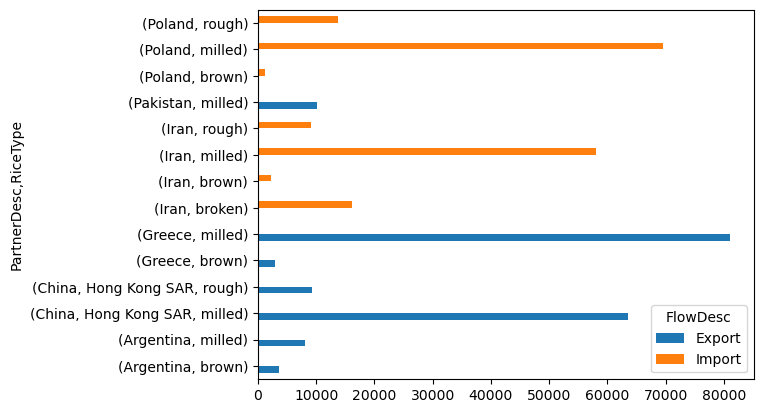

In [572]:
report_regularWeak.plot(kind='barh')

In [573]:
# Filter the "infrequent" & "high" partners in import dataset
def infrequentHigh (group):
    return len(group) < 5 and group[VALUE].sum() > 1000000

irregularStrong = rice.groupby([PARTNER, FLOW]).filter(infrequentHigh)

report_irregularStrong = pd.pivot_table(irregularStrong,
                                        index=[PARTNER, RICE],
                                        columns = FLOW,
                                        values = VALUE, 
                                        aggfunc=sum)
report_irregularStrong

FlowDesc                          Import
PartnerDesc        RiceType             
Russian Federation broken    1246789.028
                   milled       1143.264

<Axes: ylabel='PartnerDesc,RiceType'>

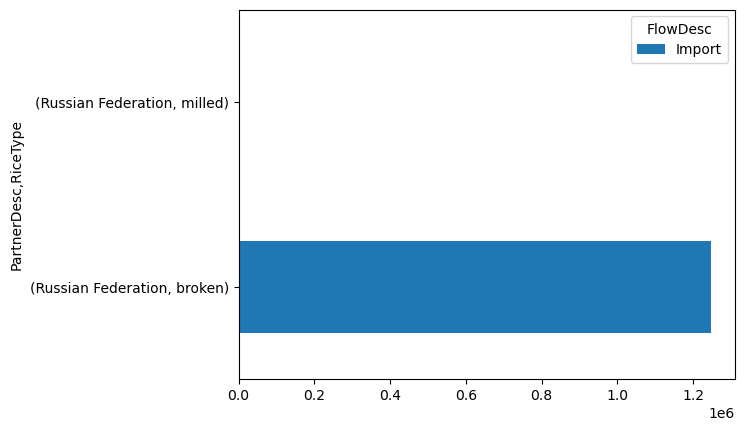

In [574]:
report_irregularStrong.plot(kind='barh')

Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country. 

In [575]:
countries = pd.pivot_table(rice, 
                           index=[PARTNER], 
                           columns=[FLOW], 
                           values=VALUE, 
                           aggfunc=sum)
countries

FlowDesc,Export,Import
PartnerDesc,,
Antarctica,17417.400,NaN
"Areas, nes",3326775.751,NaN
Argentina,11808.178,1.553813e+07
Australia,161640.196,2.879119e+06
Austria,154112.827,2.075998e+03
...,...,...
Ukraine,NaN,6.403676e+03
United Arab Emirates,270969.775,2.875990e+06
Uruguay,NaN,4.065984e+07


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with the UK.

In [576]:
countries = countries.dropna().apply(roundToThousands)
# Reset the pivot table to a regular DataFrame
countries = countries.reset_index()
countries

FlowDesc,PartnerDesc,Export,Import
0,Argentina,12.0,15538.0
1,Australia,162.0,2879.0
2,Austria,154.0,2.0
3,Bangladesh,0.0,688.0
4,Belgium,1640.0,1843.0
5,Bulgaria,6.0,162.0
6,Cambodia,0.0,15703.0
7,"China, Hong Kong SAR",73.0,113.0
8,Egypt,9.0,7.0
9,France,11577.0,1118.0


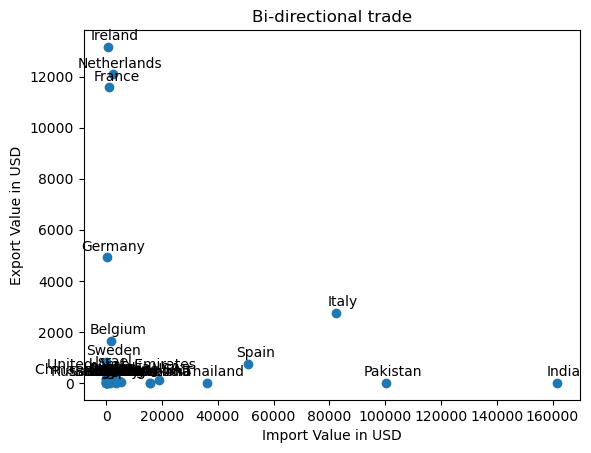

In [577]:
# Create the scatter plot
plt.scatter(countries['Import'], countries['Export'])

# Add nation names as annotations near the dots
for i, (x, y, country) in enumerate(zip(countries['Import'], countries['Export'], countries[PARTNER])):
    plt.annotate(country, (x, y), textcoords="offset points", xytext=(5, 5), ha='center')

# Set labels and title
plt.xlabel("Import Value in USD")
plt.ylabel("Export Value in USD")
plt.title("Bi-directional trade")

# Show the plot
plt.show()

It appears the UK engages in bi-directional rice trade with 32 countries, although some of the values are quite low. As shown on the scatter plot, the UK both imports and exports a certain volume of rice to and from Italy, making it the country with the strongest two-way trade according to the available data. 

## Conclusions

The rice trade of the UK from January to December 2022 was analyzed in terms of which countries and what type of rice the UK most relies upon for impots/exports. The three research questions were successfully answered as follow:

1. Which countries import the most rice for the UK in 2022?

    India. The UK regularly imports rice from South and Southeast Asian countries such as India, Pakistan, and Myanmar, with Italy serving as the most influential partner in Europe.

2. Does UK export rice to other countries? If yes, which countries export the most rice for the UK in 2022?

    Yes. The UK export rice most to Ireland. The UK does processed trade, importing brown rice from aforementioned countries and export milled rice to European countries such as France and Neetherland.

3. What kinds of rice are most popular for import and export? 

    For import: Brown rice, For export: Milled rice


The data also indicates several intersting insights.

* Over this period, the UK had a rice trade deficit exceeding 550 thousand US dollars.

* Bilateral rice trade was identified with 32 countries, though some values (in US dollars) were suspiciously low, warranting scrutiny of the data accuracy.

However, these insights are limited by analyzing only 2022 data, which included missing values and questionable figures. A longitudinal study examining multi-year trade patterns could provide a more robust interpretation, particularly regarding impacts from events like the COVID-19 pandemic before and after 2019.